# Visualizing the distribution of a dataset

* When dealing with a set of data, often the first thing you’ll want to do is get a sense for how the variables are distributed. This chapter of the tutorial will give a brief introduction to some of the tools in seaborn for examining univariate and bivariate distributions. You may also want to look at the categorical plots chapter for examples of functions that make it easy to compare the distribution of a variable across levels of other variables.

In [1]:
import seaborn as sns 
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np

## Univariate distributions: 

* The most convenient way to take a quick look at a univariate distribution in seaborn is the distplot() function. By default, this will draw a histogram and fit a kernel density estimate (KDE).

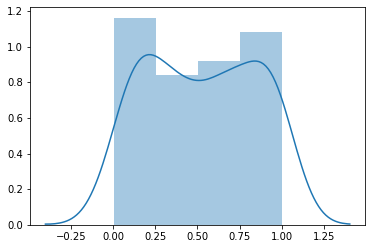

In [6]:
x = np.random.rand(100); 

sns.distplot(x);
pass

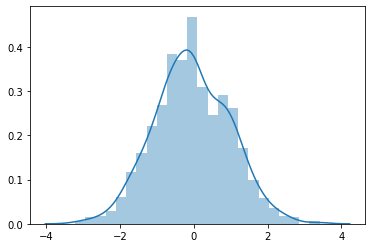

In [8]:
x = np.random.normal(size = 1000);
sns.distplot(x);

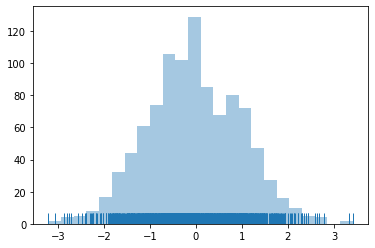

In [10]:
### Histograms:
sns.distplot(x, kde = False, rug = True);

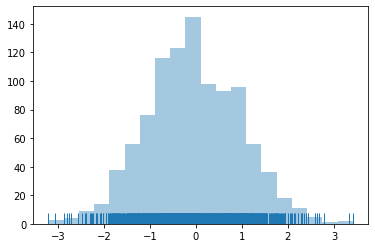

In [11]:
sns.distplot(x, kde = False, rug = True, bins = 20);

## Kernel Density Estimation: 

* The kernel density estimate may be less familiar, but it can be a useful tool for plotting the shape of a distribution. Like the histogram, the KDE plots encode the density of observations on one axis with height along the other axis:

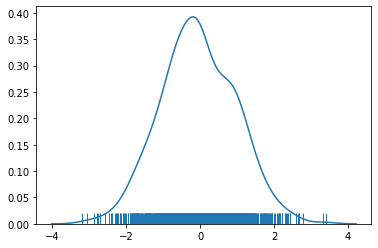

In [12]:
sns.distplot(x, hist = False, rug = True);
pass

In [13]:
values = np.random.normal(0,1,size = 100); 

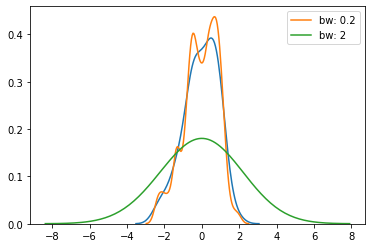

In [16]:
sns.kdeplot(values);
sns.kdeplot(values, bw = 0.2, label = "bw: 0.2")
sns.kdeplot(values, bw = 2, label = "bw: 2")
plt.legend()
pass

# Fitting parametric distributions

* You can also use distplot() to fit a parametric distribution to a dataset and visually evaluate how closely it corresponds to the observed data:

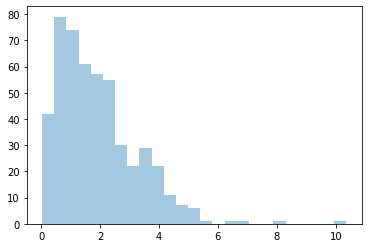

In [21]:
vals = np.random.gamma(2, size = 500);
sns.distplot(vals,  hist = True, kde = False);
pass

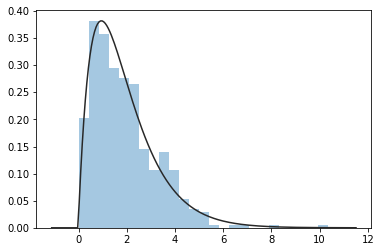

In [22]:
sns.distplot(vals, hist = True, 
             kde = False, 
             fit = stats.gamma);
pass

# Bivariate Distributions: 

* It can also be useful to visualize a bivariate distribution of two variables. The easiest way to do this in seaborn is to just use the jointplot() function, which creates a multi-panel figure that shows both the bivariate (or joint) relationship between two variables along with the univariate (or marginal) distribution of each on separate axes.

In [26]:
mean, cov = [0,1],[(1,1/2), (1/2,1)];
data = np.random.multivariate_normal(mean,cov, size = 100);
datafile = pd.DataFrame(data, columns =["X","Y"])
datafile.head()

,X,Y
0,-0.023095,0.982074
1,0.777186,1.740336
2,-0.493048,0.772505
3,-0.833675,0.387364
4,0.127944,1.777464


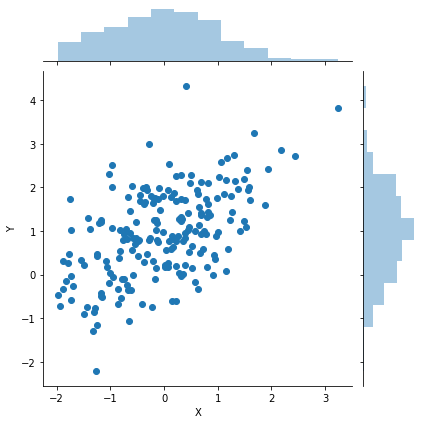

In [27]:
sns.jointplot(x = "X", y = "Y", data = datafile);

# Kernel density estimation for bivariate data.


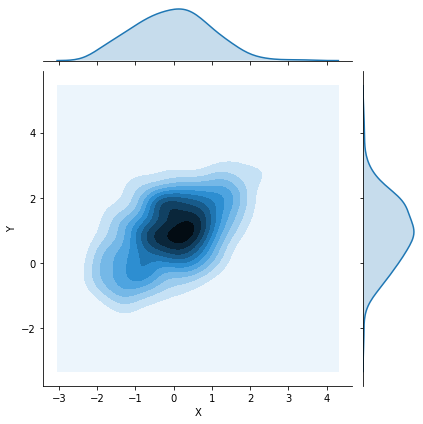

In [32]:
sns.jointplot(x = "X", y = "Y", data = datafile, 
             kind = "kde");
pass

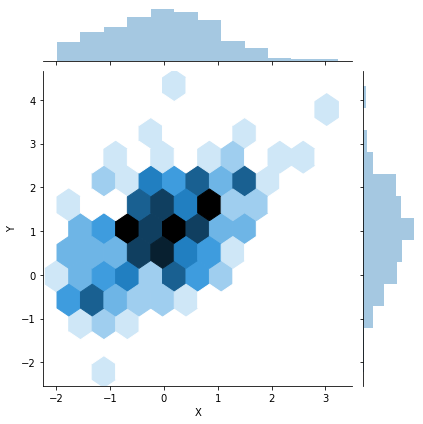

In [33]:
### Hexbin plots: 
sns.jointplot(x = "X", y = "Y", data = datafile,
             kind = "hex");
pass

# Heatmap for Bivariate data

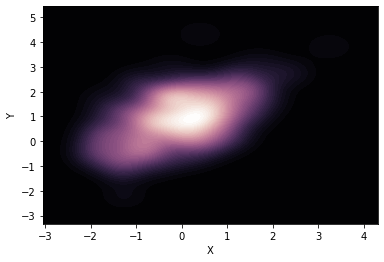

In [36]:
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, 
                             reverse=True)
sns.kdeplot(datafile.X, datafile.Y, cmap=cmap, 
            n_levels=60, shade=True);

# Visualizing pairwise relationships in a dataset

* To plot multiple pairwise bivariate distributions in a dataset, you can use the pairplot() function. This creates a matrix of axes and shows the relationship for each pair of columns in a DataFrame. By default, it also draws the univariate distribution of each variable on the diagonal Axes:

In [37]:
iris = sns.load_dataset('iris');
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [38]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

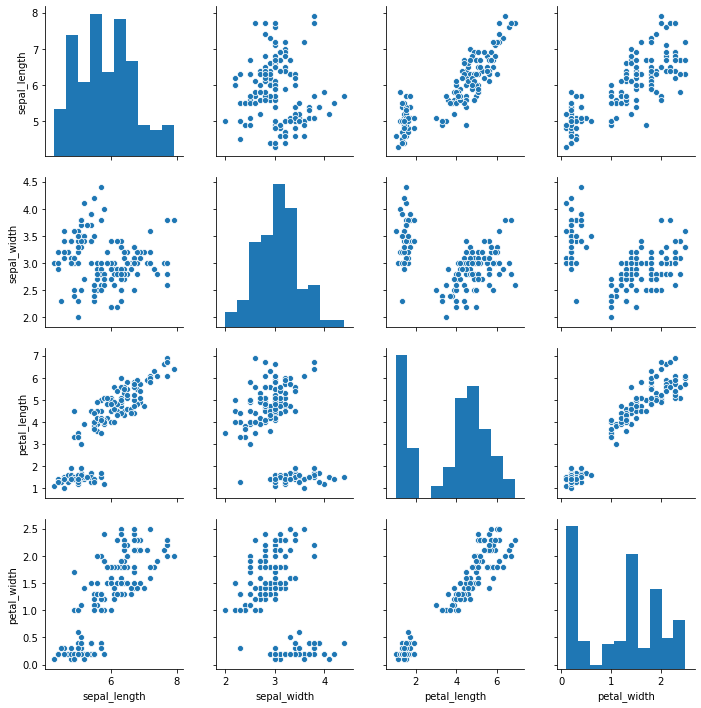

In [39]:
sns.pairplot(iris);

* We can specify the categorical factor variable, it automatically changes the histograms to KDE plots to facilitate comparisons between multiple distributions.

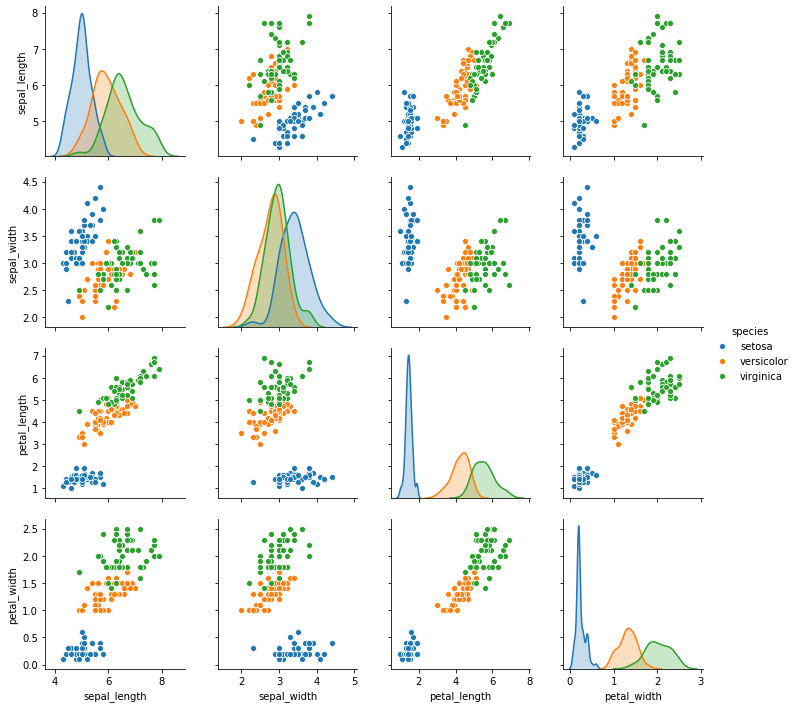

In [41]:
sns.pairplot(iris, hue = 'species');
pass

* Much like the relationship between jointplot() and JointGrid, the pairplot() function is built on top of a PairGrid object, which can be used directly for more flexibility:

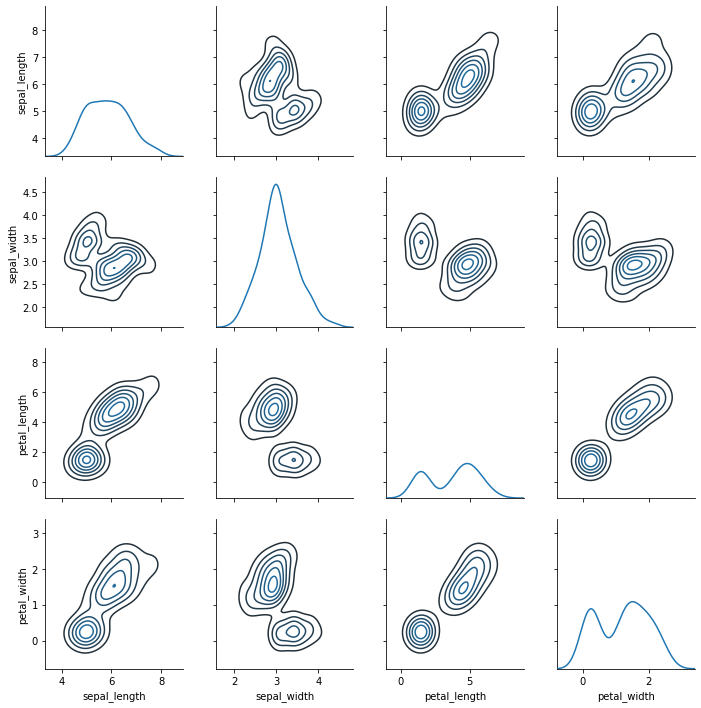

In [45]:
gplot = sns.PairGrid(iris)
gplot.map_diag(sns.kdeplot)
gplot.map_offdiag(sns.kdeplot, n_levels=6);